In [1]:
import os
import math
import json
import codecs
import numpy as np
from numpy import log, exp
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from scipy.stats import spearmanr, pearsonr, gaussian_kde

load the data

In [2]:
flankToCbf1Ddg = {}
flankToPho4Ddg = {}
firstLine = True
allFlanks = []
minPho4Ddg = 999
pho4Ref = ''
minCbf1Ddg = 999
cbf1Ref = ''
with open("data/experimental/all_predicted_ddGs.csv") as inp:
    for line in inp:
        if firstLine:
            firstLine = False
            continue
        flank, Cbf1_ddg, Pho4_ddg = line.strip().split(',')
        flankToCbf1Ddg[flank] = float(Cbf1_ddg)
        flankToPho4Ddg[flank] = float(Pho4_ddg)
        allFlanks.append(flank)
        if abs(float(Cbf1_ddg)) < minCbf1Ddg:
            minCbf1Ddg = abs(float(Cbf1_ddg))
            cbf1Ref = flank
        if abs(float(Pho4_ddg)) < minPho4Ddg:
            minPho4Ddg = abs(float(Pho4_ddg))
            pho4Ref = flank

In [3]:
obj_text1 = codecs.open("data/preds/pbexo.pho4.flankToDeltaLogCount.json", 'r', encoding='utf-8').read()
flankToPho4CountPreds = json.loads(obj_text1)

In [4]:
obj_text2 = codecs.open("data/preds/pbexo.cbf1.flankToDeltaLogCount.json", 'r', encoding='utf-8').read()
flankToCbf1CountPreds = json.loads(obj_text2)

sampling and processing

In [5]:
sampled_keys = np.random.choice(allFlanks, 100000, replace=False)

In [6]:
samplePho4CountPreds = {}
sampleCbf1CountPreds = {}
samplePho4LogCountPreds = {}
sampleCbf1LogCountPreds = {}
for key in sampled_keys:
    y_0 = np.array(flankToPho4CountPreds[key][0]).astype(float)
    y_1 = np.array(flankToPho4CountPreds[key][1]).astype(float)
    samplePho4LogCountPreds[key] = np.mean(y_1-y_0)
    samplePho4CountPreds[key] = np.mean(np.exp(y_1)-np.exp(y_0))
    y_0 = np.array(flankToCbf1CountPreds[key][0]).astype(float)
    y_1 = np.array(flankToCbf1CountPreds[key][1]).astype(float)
    sampleCbf1LogCountPreds[key] = np.mean(y_1-y_0)
    sampleCbf1CountPreds[key] = np.mean(np.exp(y_1)-np.exp(y_0))

plotting code

In [7]:
%matplotlib inline

def plotCorrs(xvals, yvals, xlabel, ylabel):
    xy = np.vstack([xvals,yvals])
    z = gaussian_kde(xy)(xy)
    smallFont = {'size' : 10}
    plt.rc('font', **smallFont)
    fig, ax = plt.subplots()
    ax.scatter(xvals, yvals, c=z, edgecolor='', alpha=0.1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("spearman: "+str(spearmanr(xvals, yvals))+", pearson: "+str(pearsonr(xvals, yvals)))
    plt.show()

delta log counts  (Pho4 PBexo)

In [8]:
xvals = []
yvals = []
for key in sampled_keys:
    xvals.append(flankToPho4Ddg[key])
    yvals.append(samplePho4LogCountPreds[key])

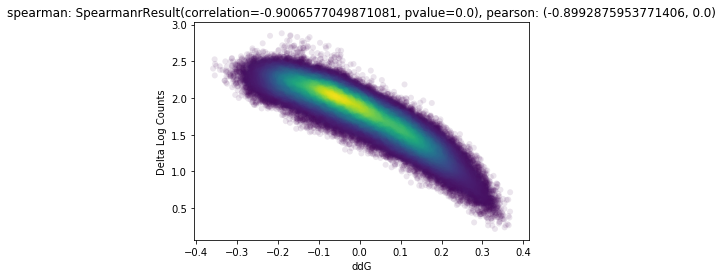

In [9]:
plotCorrs(xvals, yvals, "ddG", "Delta Log Counts")

counts fold change  (Pho4 PBexo)

In [10]:
xvals = []
yvals = []
for key in sampled_keys:
    xvals.append(flankToPho4Ddg[key])
    yvals.append(samplePho4LogCountPreds[key])
yvals = np.exp(np.array(yvals))

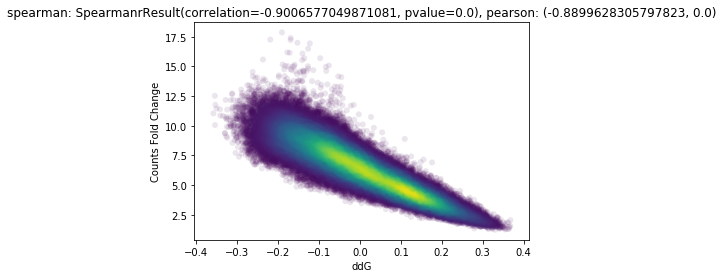

In [11]:
plotCorrs(xvals, yvals, "ddG", "Counts Fold Change")

delta delta counts (Pho4 PBexo)

In [12]:
xvals = []
yvals = []
for key in sampled_keys:
    xvals.append(flankToPho4Ddg[key])
    yvals.append(samplePho4CountPreds[key])
yvals = np.array(yvals)

In [13]:
y_0 = np.array(flankToPho4CountPreds[pho4Ref][0]).astype(float)
y_1 = np.array(flankToPho4CountPreds[pho4Ref][1]).astype(float)
refCounts = np.mean(np.exp(y_1)-np.exp(y_0))
yvals = refCounts - yvals

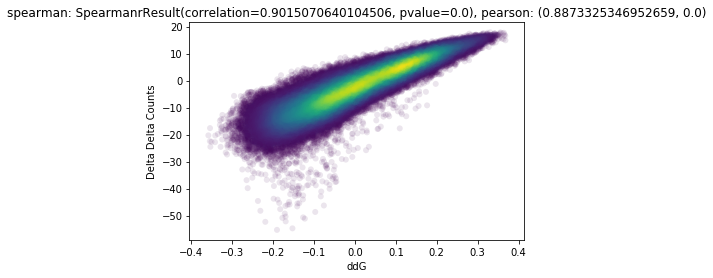

In [14]:
plotCorrs(xvals, yvals, "ddG", "Delta Delta Counts")

delta log counts  (Cbf1 PBexo)

In [15]:
xvals = []
yvals = []
for key in sampled_keys:
    xvals.append(flankToCbf1Ddg[key])
    yvals.append(sampleCbf1LogCountPreds[key])

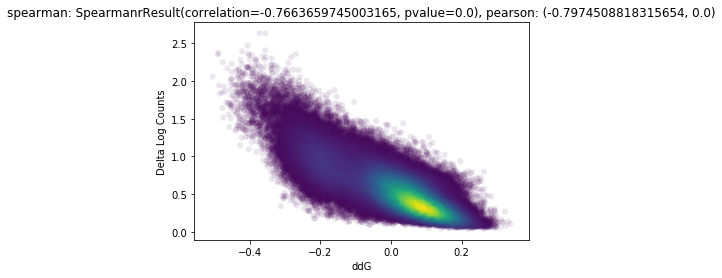

In [16]:
plotCorrs(xvals, yvals, "ddG", "Delta Log Counts")

counts fold change  (Cbf1 PBexo)

In [17]:
xvals = []
yvals = []
for key in sampled_keys:
    xvals.append(flankToCbf1Ddg[key])
    yvals.append(sampleCbf1LogCountPreds[key])
yvals = np.exp(np.array(yvals))

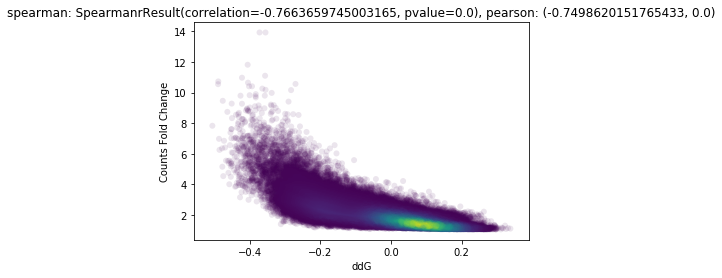

In [18]:
plotCorrs(xvals, yvals, "ddG", "Counts Fold Change")

delta delta Counts (Cbf1 PBexo)

In [19]:
xvals = []
yvals = []
for key in sampled_keys:
    xvals.append(flankToCbf1Ddg[key])
    yvals.append(sampleCbf1CountPreds[key])
yvals = np.array(yvals)

In [20]:
y_0 = np.array(flankToCbf1CountPreds[cbf1Ref][0]).astype(float)
y_1 = np.array(flankToCbf1CountPreds[cbf1Ref][1]).astype(float)
refCounts = np.mean(np.exp(y_1)-np.exp(y_0))
yvals = refCounts - yvals

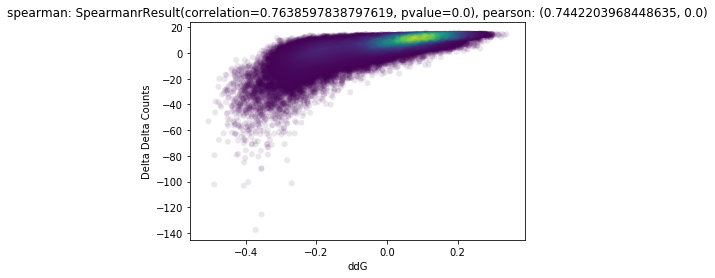

In [21]:
plotCorrs(xvals, yvals, "ddG", "Delta Delta Counts")